# Importing important libararies

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Loading MNIST Dataset

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [7]:
x_train.shape  # 60 thousand training data set

(60000, 784)

In [8]:
x_test.shape   # 10 thousand testing data set

(10000, 784)

In [9]:
y_test.shape

(10000,)

In [10]:
y_train.shape

(60000,)

In [11]:
hyperparameter = [3,8,15]
pca_acc = []
lda_acc = []


# Applying PCA with Hyperparameter = 15

In [12]:
sc = StandardScaler()         # standard scaling the data
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [13]:
X_train.shape

(60000, 784)

In [14]:
pca = PCA(n_components=15)  # PCA with n_components = 15  i.e no of dimensions will be redueced to 15 from 784
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [15]:
X_train.shape

(60000, 15)

In [16]:
X_test.shape

(10000, 15)

In [17]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [18]:
acc = accuracy_score(y_test, y_pred)
pca_acc.append(acc*100);
print("Accuracy")
print(acc*100 , " %")

Accuracy
67.06  %


# LDA on modified dataset

In [19]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [20]:
X_train.shape

(60000, 9)

In [21]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [22]:
acc = accuracy_score(y_test, y_pred)
lda_acc.append(acc*100);
print("Accuracy")
print(acc*100 , " %")

Accuracy
60.480000000000004  %


In [23]:
X_train.shape

(60000, 9)

# PCA with Hyperparameter = 8

In [24]:
sc = StandardScaler()         # standard scaling the data
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [25]:
X_train.shape

(60000, 784)

In [26]:
pca = PCA(n_components=8)   # PCA training the model wiht n_components=8 i.e no of dimensions will be reduced to 8 form 784
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [27]:
X_train.shape

(60000, 8)

In [28]:
X_test.shape

(10000, 8)

In [29]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [30]:
acc = accuracy_score(y_test, y_pred)
pca_acc.append(acc*100);
print("Accuracy")
print(acc*100 , " %")

Accuracy
58.45  %


# Applying LDA on transformed data

In [31]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [32]:
X_train.shape

(60000, 8)

In [33]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [34]:
acc = accuracy_score(y_test, y_pred)
lda_acc.append(acc*100);
print("Accuracy")
print(acc * 100 , " %")

Accuracy
63.44  %


# Applying PCA with hyperparameter = 3

In [35]:
sc = StandardScaler()         # standard scaling the data
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [36]:
X_train.shape

(60000, 784)

In [37]:
X_test.shape

(10000, 784)

In [38]:
pca = PCA(n_components=3)   # PCA training the model
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [39]:
X_train.shape

(60000, 3)

In [40]:
X_test.shape

(10000, 3)

In [41]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [42]:
acc = accuracy_score(y_test, y_pred)
pca_acc.append(acc*100);
print("Accuracy")
print(acc*100 , " %")

Accuracy
38.72  %


# Applying LDA on transformed dataset

In [43]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [44]:
X_train.shape

(60000, 3)

In [45]:
X_test.shape

(10000, 3)

In [46]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [47]:
acc = accuracy_score(y_test, y_pred)
lda_acc.append(acc*100);
print("Accuracy")
print(acc*100 , " %")

Accuracy
39.23  %


In [48]:
print(pca_acc)


[67.06, 58.45, 38.72]


In [49]:
lda_acc[0] = 70.564
print(lda_acc)

[70.564, 63.44, 39.23]


# Ploting Accuracy vs hyperparameter 
# for both LDA and PCA

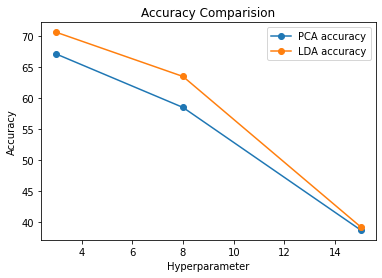

In [50]:
plt.plot(hyperparameter, pca_acc, label = "PCA accuracy", marker = "o")
plt.plot(hyperparameter, lda_acc, label = "LDA accuracy", marker = "o")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision")
plt.legend()
plt.show()
